In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from scipy import stats
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.manifold import TSNE

In [2]:
bankingDataset = pd.read_csv("/content/sample_data/banking.csv")

In [3]:
bankingDataframe = pd.DataFrame(bankingDataset)

In [4]:
bankingDataframe.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


# **PART 1**

In [5]:
total1 = bankingDataframe.isnull().sum().sort_values(ascending = False)
percent1 = (bankingDataframe.isnull().sum()/bankingDataframe.isnull().count()).sort_values(ascending = False)
missing_data1 = pd.concat([total1,percent1], axis = 1, keys = ['Total', 'Percent'])
print(missing_data1.to_string())

                Total  Percent
age                 0      0.0
campaign            0      0.0
nr_employed         0      0.0
euribor3m           0      0.0
cons_conf_idx       0      0.0
cons_price_idx      0      0.0
emp_var_rate        0      0.0
poutcome            0      0.0
previous            0      0.0
pdays               0      0.0
duration            0      0.0
job                 0      0.0
day_of_week         0      0.0
month               0      0.0
contact             0      0.0
loan                0      0.0
housing             0      0.0
default             0      0.0
education           0      0.0
marital             0      0.0
y                   0      0.0


In [6]:
print(bankingDataframe.dtypes)

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp_var_rate      float64
cons_price_idx    float64
cons_conf_idx     float64
euribor3m         float64
nr_employed       float64
y                   int64
dtype: object


### **Converting categorical features to numerical:**

In [7]:
object_vars = list(bankingDataframe.select_dtypes(include=['object']).columns)

object_vars

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome']

In [8]:
for obj_var in object_vars:
    categories = bankingDataframe[obj_var].unique().tolist()
    print(f"{obj_var} categories: {categories}")

job categories: ['blue-collar', 'technician', 'management', 'services', 'retired', 'admin.', 'housemaid', 'unemployed', 'entrepreneur', 'self-employed', 'unknown', 'student']
marital categories: ['married', 'single', 'divorced', 'unknown']
education categories: ['basic.4y', 'unknown', 'university.degree', 'high.school', 'basic.9y', 'professional.course', 'basic.6y', 'illiterate']
default categories: ['unknown', 'no', 'yes']
housing categories: ['yes', 'no', 'unknown']
loan categories: ['no', 'yes', 'unknown']
contact categories: ['cellular', 'telephone']
month categories: ['aug', 'nov', 'jun', 'apr', 'jul', 'may', 'oct', 'mar', 'sep', 'dec']
day_of_week categories: ['thu', 'fri', 'tue', 'mon', 'wed']
poutcome categories: ['nonexistent', 'success', 'failure']


In [9]:
bankingDataframe_numerical = bankingDataframe.copy()

In [10]:
job_encoded = pd.get_dummies(bankingDataframe_numerical['job'], prefix='job')
bankingDataframe_numerical = pd.concat([bankingDataframe_numerical.drop('job', axis=1), job_encoded], axis=1)
bankingDataframe_numerical = bankingDataframe_numerical.drop('job_unknown', axis=1)

bankingDataframe_numerical.head(5)

,age,marital,education,default,housing,loan,contact,month,day_of_week,duration,...,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed
0,44,married,basic.4y,unknown,yes,no,cellular,aug,thu,210,...,1,0,0,0,0,0,0,0,0,0
1,53,married,unknown,no,no,no,cellular,nov,fri,138,...,0,0,0,0,0,0,0,0,1,0
2,28,single,university.degree,no,yes,no,cellular,jun,thu,339,...,0,0,0,1,0,0,0,0,0,0
3,39,married,high.school,no,no,no,cellular,apr,fri,185,...,0,0,0,0,0,0,1,0,0,0
4,55,married,basic.4y,no,yes,no,cellular,aug,fri,137,...,0,0,0,0,1,0,0,0,0,0


In [11]:
marital_encoded = pd.get_dummies(bankingDataframe_numerical['marital'], prefix='marital')
bankingDataframe_numerical = pd.concat([bankingDataframe_numerical.drop('marital', axis=1), marital_encoded], axis=1)
bankingDataframe_numerical = bankingDataframe_numerical.drop('marital_unknown', axis=1)

bankingDataframe_numerical.head(5)

,age,education,default,housing,loan,contact,month,day_of_week,duration,campaign,...,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_married,marital_single
0,44,basic.4y,unknown,yes,no,cellular,aug,thu,210,1,...,0,0,0,0,0,0,0,0,1,0
1,53,unknown,no,no,no,cellular,nov,fri,138,1,...,0,0,0,0,0,1,0,0,1,0
2,28,university.degree,no,yes,no,cellular,jun,thu,339,3,...,1,0,0,0,0,0,0,0,0,1
3,39,high.school,no,no,no,cellular,apr,fri,185,2,...,0,0,0,1,0,0,0,0,1,0
4,55,basic.4y,no,yes,no,cellular,aug,fri,137,1,...,0,1,0,0,0,0,0,0,1,0


In [12]:
education_encoded = {'unknown': 0, 'illiterate': 1, 'basic.4y': 2, 'basic.6y': 3,
               'basic.9y': 4, 'high.school': 5, 'professional.course': 6,
               'university.degree': 7}
bankingDataframe_numerical['education_encoded'] = bankingDataframe_numerical['education'].map(education_encoded)
bankingDataframe_numerical.drop('education', axis=1, inplace=True)

bankingDataframe_numerical.head(5)

,age,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,...,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_married,marital_single,education_encoded
0,44,unknown,yes,no,cellular,aug,thu,210,1,999,...,0,0,0,0,0,0,0,1,0,2
1,53,no,no,no,cellular,nov,fri,138,1,999,...,0,0,0,0,1,0,0,1,0,0
2,28,no,yes,no,cellular,jun,thu,339,3,6,...,0,0,0,0,0,0,0,0,1,7
3,39,no,no,no,cellular,apr,fri,185,2,999,...,0,0,1,0,0,0,0,1,0,5
4,55,no,yes,no,cellular,aug,fri,137,1,3,...,1,0,0,0,0,0,0,1,0,2


In [13]:
education_unknown_count = sum(1 for row in bankingDataframe_numerical['education_encoded'] if row == 0)
education_unknown_percent = (education_unknown_count / len(bankingDataframe_numerical['education_encoded'])) * 100

print("Number of 0s: ", education_unknown_count)
print("Percentage of 0s: {:.2f}%".format(education_unknown_percent))

Number of 0s:  1731
Percentage of 0s: 4.20%


In [14]:
default_encoded = pd.get_dummies(bankingDataframe_numerical['default'], prefix='default')
bankingDataframe_numerical = pd.concat([bankingDataframe_numerical.drop('default', axis=1), default_encoded], axis=1)
bankingDataframe_numerical = bankingDataframe_numerical.drop('default_unknown', axis=1)

bankingDataframe_numerical.head(5)

,age,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,...,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_married,marital_single,education_encoded,default_no,default_yes
0,44,yes,no,cellular,aug,thu,210,1,999,0,...,0,0,0,0,0,1,0,2,0,0
1,53,no,no,cellular,nov,fri,138,1,999,0,...,0,0,1,0,0,1,0,0,1,0
2,28,yes,no,cellular,jun,thu,339,3,6,2,...,0,0,0,0,0,0,1,7,1,0
3,39,no,no,cellular,apr,fri,185,2,999,0,...,1,0,0,0,0,1,0,5,1,0
4,55,yes,no,cellular,aug,fri,137,1,3,1,...,0,0,0,0,0,1,0,2,1,0


In [15]:
housing_encoded = pd.get_dummies(bankingDataframe_numerical['housing'], prefix='housing')
bankingDataframe_numerical = pd.concat([bankingDataframe_numerical.drop('housing', axis=1), housing_encoded], axis=1)
bankingDataframe_numerical = bankingDataframe_numerical.drop('housing_unknown', axis=1)

bankingDataframe_numerical.head(5)

,age,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,...,job_technician,job_unemployed,marital_divorced,marital_married,marital_single,education_encoded,default_no,default_yes,housing_no,housing_yes
0,44,no,cellular,aug,thu,210,1,999,0,nonexistent,...,0,0,0,1,0,2,0,0,0,1
1,53,no,cellular,nov,fri,138,1,999,0,nonexistent,...,1,0,0,1,0,0,1,0,1,0
2,28,no,cellular,jun,thu,339,3,6,2,success,...,0,0,0,0,1,7,1,0,0,1
3,39,no,cellular,apr,fri,185,2,999,0,nonexistent,...,0,0,0,1,0,5,1,0,1,0
4,55,no,cellular,aug,fri,137,1,3,1,success,...,0,0,0,1,0,2,1,0,0,1


In [16]:
loan_encoded = pd.get_dummies(bankingDataframe_numerical['loan'], prefix='loan')
bankingDataframe_numerical = pd.concat([bankingDataframe_numerical.drop('loan', axis=1), loan_encoded], axis=1)
bankingDataframe_numerical = bankingDataframe_numerical.drop('loan_unknown', axis=1)

bankingDataframe_numerical.head(5)

,age,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,...,marital_divorced,marital_married,marital_single,education_encoded,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes
0,44,cellular,aug,thu,210,1,999,0,nonexistent,1.4,...,0,1,0,2,0,0,0,1,1,0
1,53,cellular,nov,fri,138,1,999,0,nonexistent,-0.1,...,0,1,0,0,1,0,1,0,1,0
2,28,cellular,jun,thu,339,3,6,2,success,-1.7,...,0,0,1,7,1,0,0,1,1,0
3,39,cellular,apr,fri,185,2,999,0,nonexistent,-1.8,...,0,1,0,5,1,0,1,0,1,0
4,55,cellular,aug,fri,137,1,3,1,success,-2.9,...,0,1,0,2,1,0,0,1,1,0


In [17]:
contact_encoded = pd.get_dummies(bankingDataframe_numerical['contact'], prefix='contact')
bankingDataframe_numerical = pd.concat([bankingDataframe_numerical.drop('contact', axis=1), contact_encoded], axis=1)

bankingDataframe_numerical.head(5)

,age,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,...,marital_single,education_encoded,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone
0,44,aug,thu,210,1,999,0,nonexistent,1.4,93.444,...,0,2,0,0,0,1,1,0,1,0
1,53,nov,fri,138,1,999,0,nonexistent,-0.1,93.200,...,0,0,1,0,1,0,1,0,1,0
2,28,jun,thu,339,3,6,2,success,-1.7,94.055,...,1,7,1,0,0,1,1,0,1,0
3,39,apr,fri,185,2,999,0,nonexistent,-1.8,93.075,...,0,5,1,0,1,0,1,0,1,0
4,55,aug,fri,137,1,3,1,success,-2.9,92.201,...,0,2,1,0,0,1,1,0,1,0


In [18]:
month_encoded = {'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6,
                 'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12}
bankingDataframe_numerical['month_encoded'] = bankingDataframe_numerical['month'].map(month_encoded)
bankingDataframe_numerical.drop('month', axis=1, inplace=True)

bankingDataframe_numerical.head(5)

,age,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,...,education_encoded,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,month_encoded
0,44,thu,210,1,999,0,nonexistent,1.4,93.444,-36.1,...,2,0,0,0,1,1,0,1,0,8
1,53,fri,138,1,999,0,nonexistent,-0.1,93.200,-42.0,...,0,1,0,1,0,1,0,1,0,11
2,28,thu,339,3,6,2,success,-1.7,94.055,-39.8,...,7,1,0,0,1,1,0,1,0,6
3,39,fri,185,2,999,0,nonexistent,-1.8,93.075,-47.1,...,5,1,0,1,0,1,0,1,0,4
4,55,fri,137,1,3,1,success,-2.9,92.201,-31.4,...,2,1,0,0,1,1,0,1,0,8


In [19]:
day_of_week_encoded = {'mon': 1, 'tue': 2, 'wed': 3, 'thu': 4, 'fri': 5}
bankingDataframe_numerical['day_of_week_encoded'] = bankingDataframe_numerical['day_of_week'].map(day_of_week_encoded)
bankingDataframe_numerical.drop('day_of_week', axis=1, inplace=True)

bankingDataframe_numerical.head(5)

,age,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,...,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,month_encoded,day_of_week_encoded
0,44,210,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,...,0,0,0,1,1,0,1,0,8,4
1,53,138,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,...,1,0,1,0,1,0,1,0,11,5
2,28,339,3,6,2,success,-1.7,94.055,-39.8,0.729,...,1,0,0,1,1,0,1,0,6,4
3,39,185,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,...,1,0,1,0,1,0,1,0,4,5
4,55,137,1,3,1,success,-2.9,92.201,-31.4,0.869,...,1,0,0,1,1,0,1,0,8,5


In [20]:
poutcome_encoded = pd.get_dummies(bankingDataframe_numerical['poutcome'], prefix='poutcome')
bankingDataframe_numerical = pd.concat([bankingDataframe_numerical.drop('poutcome', axis=1), poutcome_encoded], axis=1)
bankingDataframe_numerical = bankingDataframe_numerical.drop('poutcome_nonexistent', axis=1)

bankingDataframe_numerical.head(5)

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,...,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,month_encoded,day_of_week_encoded,poutcome_failure,poutcome_success
0,44,210,1,999,0,1.4,93.444,-36.1,4.963,5228.1,...,0,1,1,0,1,0,8,4,0,0
1,53,138,1,999,0,-0.1,93.200,-42.0,4.021,5195.8,...,1,0,1,0,1,0,11,5,0,0
2,28,339,3,6,2,-1.7,94.055,-39.8,0.729,4991.6,...,0,1,1,0,1,0,6,4,0,1
3,39,185,2,999,0,-1.8,93.075,-47.1,1.405,5099.1,...,1,0,1,0,1,0,4,5,0,0
4,55,137,1,3,1,-2.9,92.201,-31.4,0.869,5076.2,...,0,1,1,0,1,0,8,5,0,1


In [21]:
print(bankingDataframe_numerical.dtypes)

age                      int64
duration                 int64
campaign                 int64
pdays                    int64
previous                 int64
emp_var_rate           float64
cons_price_idx         float64
cons_conf_idx          float64
euribor3m              float64
nr_employed            float64
y                        int64
job_admin.               uint8
job_blue-collar          uint8
job_entrepreneur         uint8
job_housemaid            uint8
job_management           uint8
job_retired              uint8
job_self-employed        uint8
job_services             uint8
job_student              uint8
job_technician           uint8
job_unemployed           uint8
marital_divorced         uint8
marital_married          uint8
marital_single           uint8
education_encoded        int64
default_no               uint8
default_yes              uint8
housing_no               uint8
housing_yes              uint8
loan_no                  uint8
loan_yes                 uint8
contact_

### **Scaling the features using StandardScaler, MinMaxScaler and RobustScaler:**

In [22]:
print(bankingDataframe_numerical.describe())

               age      duration      campaign         pdays      previous  \
count  41188.00000  41188.000000  41188.000000  41188.000000  41188.000000   
mean      40.02406    258.285010      2.567593    962.475454      0.172963   
std       10.42125    259.279249      2.770014    186.910907      0.494901   
min       17.00000      0.000000      1.000000      0.000000      0.000000   
25%       32.00000    102.000000      1.000000    999.000000      0.000000   
50%       38.00000    180.000000      2.000000    999.000000      0.000000   
75%       47.00000    319.000000      3.000000    999.000000      0.000000   
max       98.00000   4918.000000     56.000000    999.000000      7.000000   

       emp_var_rate  cons_price_idx  cons_conf_idx     euribor3m  \
count  41188.000000    41188.000000   41188.000000  41188.000000   
mean       0.081886       93.575664     -40.502600      3.621291   
std        1.570960        0.578840       4.628198      1.734447   
min       -3.400000      

##### - StandardScaler:
1. It scales the data by subtracting the mean and dividing by the standard deviation.
2. It is useful when the data follows a normal distribution, and the features have different variances.
3. It is recommended to use StandardScaler when the data has outliers, but it does not handle them well.

In [23]:
scaler = StandardScaler()
bankingDataframe_standard = pd.DataFrame(scaler.fit_transform(bankingDataframe_numerical), columns=bankingDataframe_numerical.columns)

bankingDataframe_standard.head(5)

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,...,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,month_encoded,day_of_week_encoded,poutcome_failure,poutcome_success
0,0.381527,-0.186230,-0.565922,0.195414,-0.349494,0.839061,-0.227465,0.951267,0.773575,0.845170,...,-0.908418,0.953401,0.461731,-0.422872,0.75857,-0.75857,0.682079,0.722934,-0.33929,-0.18570
1,1.245157,-0.463926,-0.565922,0.195414,-0.349494,-0.115781,-0.649003,-0.323542,0.230456,0.398115,...,1.100814,-1.048877,0.461731,-0.422872,0.75857,-0.75857,2.151966,1.431401,-0.33929,-0.18570
2,-1.153816,0.311309,0.156105,-5.117342,3.691766,-1.134279,0.828107,0.151810,-1.667578,-2.428157,...,-0.908418,0.953401,0.461731,-0.422872,0.75857,-0.75857,-0.297846,0.722934,-0.33929,5.38503
3,-0.098268,-0.282652,-0.204909,0.195414,-0.349494,-1.197935,-0.864955,-1.425496,-1.277824,-0.940281,...,1.100814,-1.048877,0.461731,-0.422872,0.75857,-0.75857,-1.277771,1.431401,-0.33929,-0.18570
4,1.437075,-0.467783,-0.565922,-5.133393,1.671136,-1.898153,-2.374889,1.966794,-1.586859,-1.257233,...,-0.908418,0.953401,0.461731,-0.422872,0.75857,-0.75857,0.682079,1.431401,-0.33929,5.38503


In [24]:
print(bankingDataframe_standard.describe())

                age      duration      campaign         pdays      previous  \
count  4.118800e+04  4.118800e+04  4.118800e+04  4.118800e+04  4.118800e+04   
mean  -1.826472e-16 -9.876316e-18 -8.017499e-17 -2.648923e-16  2.242657e-18   
std    1.000012e+00  1.000012e+00  1.000012e+00  1.000012e+00  1.000012e+00   
min   -2.209365e+00 -9.961775e-01 -5.659220e-01 -5.149443e+00 -3.494943e-01   
25%   -7.699804e-01 -6.027745e-01 -5.659220e-01  1.954139e-01 -3.494943e-01   
50%   -1.942267e-01 -3.019369e-01 -2.049085e-01  1.954139e-01 -3.494943e-01   
75%    6.694038e-01  2.341712e-01  1.561049e-01  1.954139e-01 -3.494943e-01   
max    5.563310e+00  1.797202e+01  1.928982e+01  1.954139e-01  1.379492e+01   

       emp_var_rate  cons_price_idx  cons_conf_idx     euribor3m  \
count  4.118800e+04    4.118800e+04   4.118800e+04  4.118800e+04   
mean   2.070145e-18   -8.551639e-15  -2.318994e-16  1.103215e-16   
std    1.000012e+00    1.000012e+00   1.000012e+00  1.000012e+00   
min   -2.216433e

##### - MinMaxScaler:
1. It scales the data to a fixed range, usually between 0 and 1.
2. It is useful for algorithms that require input values to be within a specific range or when comparing features with different units.
3. It is also suitable for cases where the data is not normally distributed.
4. it is highly sensitive to outliers, which might affect the scaling of the entire feature.
5. It transforms the data to be within a specific range, 0 and 1.

In [25]:
scaler = MinMaxScaler()
bankingDataframe_minMax = pd.DataFrame(scaler.fit_transform(bankingDataframe_numerical), columns=bankingDataframe_numerical.columns)

bankingDataframe_minMax.head(5)

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,...,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,month_encoded,day_of_week_encoded,poutcome_failure,poutcome_success
0,0.333333,0.042700,0.000000,1.000000,0.000000,1.000000,0.484412,0.615063,0.981410,1.000000,...,0.0,1.0,1.0,0.0,1.0,0.0,0.555556,0.75,0.0,0.0
1,0.444444,0.028060,0.000000,1.000000,0.000000,0.687500,0.389322,0.368201,0.767853,0.877883,...,1.0,0.0,1.0,0.0,1.0,0.0,0.888889,1.00,0.0,0.0
2,0.135802,0.068930,0.036364,0.006006,0.285714,0.354167,0.722525,0.460251,0.021537,0.105860,...,0.0,1.0,1.0,0.0,1.0,0.0,0.333333,0.75,0.0,1.0
3,0.271605,0.037617,0.018182,1.000000,0.000000,0.333333,0.340608,0.154812,0.174790,0.512287,...,1.0,0.0,1.0,0.0,1.0,0.0,0.111111,1.00,0.0,0.0
4,0.469136,0.027857,0.000000,0.003003,0.142857,0.104167,0.000000,0.811715,0.053276,0.425709,...,0.0,1.0,1.0,0.0,1.0,0.0,0.555556,1.00,0.0,1.0


In [26]:
print(bankingDataframe_minMax.describe())

                age      duration      campaign         pdays      previous  \
count  41188.000000  41188.000000  41188.000000  41188.000000  41188.000000   
mean       0.284248      0.052518      0.028502      0.963439      0.024709   
std        0.128657      0.052720      0.050364      0.187098      0.070700   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.185185      0.020740      0.000000      1.000000      0.000000   
50%        0.259259      0.036600      0.018182      1.000000      0.000000   
75%        0.370370      0.064864      0.036364      1.000000      0.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

       emp_var_rate  cons_price_idx  cons_conf_idx     euribor3m  \
count  41188.000000    41188.000000   41188.000000  41188.000000   
mean       0.725393        0.535723       0.430854      0.677237   
std        0.327283        0.225581       0.193648      0.393210   
min        0.000

##### - RobustScaler:
1. It scales the data using statistics that are robust to outliers, such as the median and interquartile range (IQR), rather than the mean and standard deviation.
2. It is useful when the data contains many outliers, and we want to scale the data without letting the outliers influence the scaling.
3. It is less sensitive to outliers than MinMaxScaler, making it suitable for data sets with many extreme values.

In [27]:
scaler = RobustScaler()
bankingDataframe_robust = pd.DataFrame(scaler.fit_transform(bankingDataframe_numerical), columns=bankingDataframe_numerical.columns)

bankingDataframe_robust.head(5)

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,...,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,month_encoded,day_of_week_encoded,poutcome_failure,poutcome_success
0,0.400000,0.138249,-0.5,0.0,0.0,0.09375,-0.331882,0.904762,0.029306,0.287597,...,0.0,0.0,0.0,0.0,0.0,0.0,0.666667,0.5,0.0,0.0
1,1.000000,-0.193548,-0.5,0.0,0.0,-0.37500,-0.597388,-0.031746,-0.231131,0.037209,...,1.0,-1.0,0.0,0.0,0.0,0.0,1.666667,1.0,0.0,0.0
2,-0.666667,0.732719,0.5,-993.0,2.0,-0.87500,0.332971,0.317460,-1.141277,-1.545736,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.5,0.0,1.0
3,0.066667,0.023041,0.0,0.0,0.0,-0.90625,-0.733406,-0.841270,-0.954382,-0.712403,...,1.0,-1.0,0.0,0.0,0.0,0.0,-0.666667,1.0,0.0,0.0
4,1.133333,-0.198157,-0.5,-996.0,1.0,-1.25000,-1.684440,1.650794,-1.102571,-0.889922,...,0.0,0.0,0.0,0.0,0.0,0.0,0.666667,1.0,0.0,1.0


In [28]:
print(bankingDataframe_robust.describe())

                age      duration      campaign         pdays      previous  \
count  41188.000000  41188.000000  41188.000000  41188.000000  41188.000000   
mean       0.134937      0.360760      0.283796    -36.524546      0.172963   
std        0.694750      1.194835      1.385007    186.910907      0.494901   
min       -1.400000     -0.829493     -0.500000   -999.000000      0.000000   
25%       -0.400000     -0.359447     -0.500000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.600000      0.640553      0.500000      0.000000      0.000000   
max        4.000000     21.834101     27.000000      0.000000      7.000000   

       emp_var_rate  cons_price_idx  cons_conf_idx     euribor3m  \
count  41188.000000    41188.000000   41188.000000  41188.000000   
mean      -0.318161       -0.188613       0.205936     -0.341639   
std        0.490925        0.629859       0.734635      0.479527   
min       -1.406

##### - Choosing between these 3 techniques:

1. The descriptive statistics provide a summary of the distribution of each feature.
2. A scaler that produces features with a similar range and variance across all features, is the best.
3. A good scaler will produce standardized features with zero mean and unit variance.

--> Based on these metrics and the below descriptions, MinMaxScaler is the best.

In [29]:
print(bankingDataframe_standard.describe())
print(bankingDataframe_minMax.describe())
print(bankingDataframe_robust.describe())

                age      duration      campaign         pdays      previous  \
count  4.118800e+04  4.118800e+04  4.118800e+04  4.118800e+04  4.118800e+04   
mean  -1.826472e-16 -9.876316e-18 -8.017499e-17 -2.648923e-16  2.242657e-18   
std    1.000012e+00  1.000012e+00  1.000012e+00  1.000012e+00  1.000012e+00   
min   -2.209365e+00 -9.961775e-01 -5.659220e-01 -5.149443e+00 -3.494943e-01   
25%   -7.699804e-01 -6.027745e-01 -5.659220e-01  1.954139e-01 -3.494943e-01   
50%   -1.942267e-01 -3.019369e-01 -2.049085e-01  1.954139e-01 -3.494943e-01   
75%    6.694038e-01  2.341712e-01  1.561049e-01  1.954139e-01 -3.494943e-01   
max    5.563310e+00  1.797202e+01  1.928982e+01  1.954139e-01  1.379492e+01   

       emp_var_rate  cons_price_idx  cons_conf_idx     euribor3m  \
count  4.118800e+04    4.118800e+04   4.118800e+04  4.118800e+04   
mean   2.070145e-18   -8.551639e-15  -2.318994e-16  1.103215e-16   
std    1.000012e+00    1.000012e+00   1.000012e+00  1.000012e+00   
min   -2.216433e

1. The box plots show the distribution of values for each feature.
2. A scaler that produces features with a median close to 0 and an interquartile range that spans a similar distance across all features, is the best.
3.Scalers that produce extreme outliers or features that are heavily skewed, are the worst.

--> Based on these metrics and the below box plots, MinMaxScaler is somehow the best.

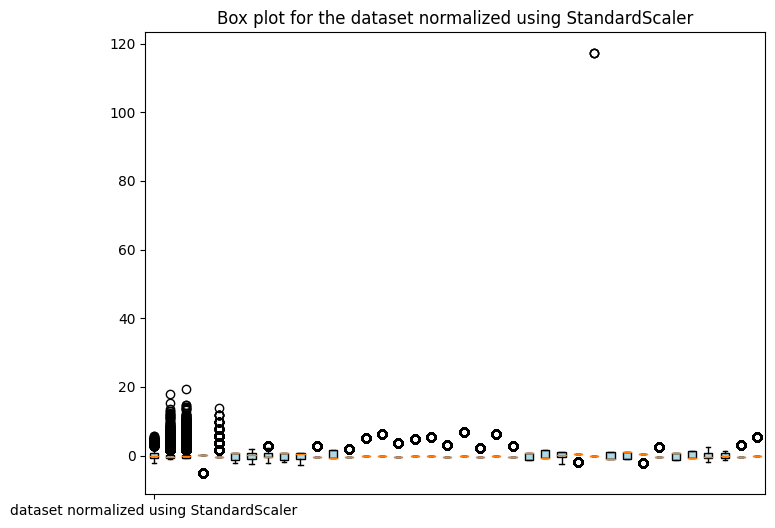

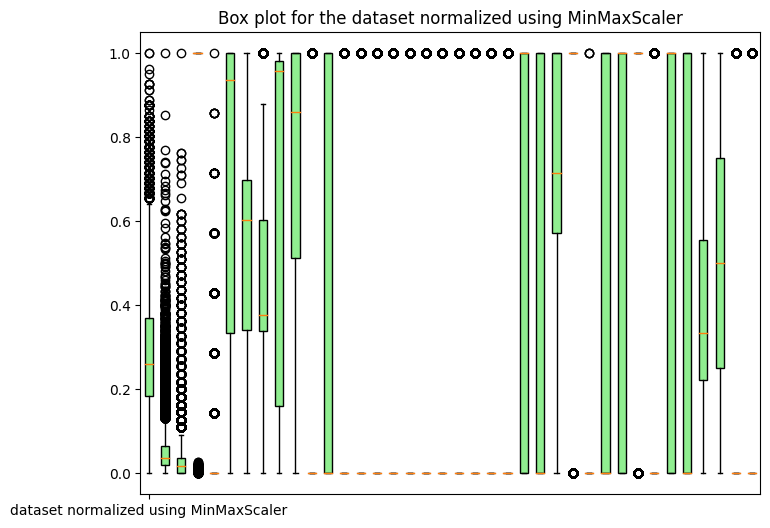

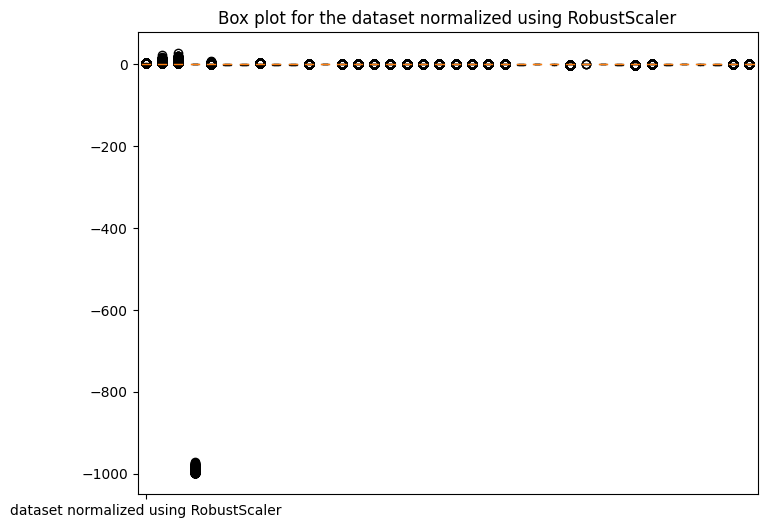

In [30]:
# Box plot for bankingDataframe_standard
plt.figure(figsize=(8, 6))
bp = plt.boxplot(bankingDataframe_standard.values, patch_artist=True)
plt.title('Box plot for the dataset normalized using StandardScaler')
plt.xticks([1], ['dataset normalized using StandardScaler'])
for box in bp['boxes']:
    box.set(facecolor='lightblue')

plt.show()

# Box plot for bankingDataframe_minMax
plt.figure(figsize=(8, 6))
bp = plt.boxplot(bankingDataframe_minMax.values, patch_artist=True)
plt.title('Box plot for the dataset normalized using MinMaxScaler')
plt.xticks([1], ['dataset normalized using MinMaxScaler'])
for box in bp['boxes']:
    box.set(facecolor='lightgreen')

plt.show()

# Box plot for bankingDataframe_robust
plt.figure(figsize=(8, 6))
bp = plt.boxplot(bankingDataframe_robust.values, patch_artist=True)
plt.title('Box plot for the dataset normalized using RobustScaler')
plt.xticks([1], ['dataset normalized using RobustScaler'])
for box in bp['boxes']:
    box.set(facecolor='pink')

plt.show()

### **dealing with high-dimensional data using Feature Selection and Dimensionality Reduction:**

In [32]:
# splitting the dataset into input features and target variable (y)
x_standard = bankingDataframe_standard.drop('y', axis=1)
y_standard = bankingDataframe_standard['y']

x_minMax = bankingDataframe_minMax.drop('y', axis=1)
y_minMax = bankingDataframe_minMax['y']

x_robust = bankingDataframe_robust.drop('y', axis=1)
y_robust = bankingDataframe_robust['y']

##### Since I have already transformed all the categorical columns to numerical using one-hot encoding and label encoding, I can treat them as numerical columns and proceed with the dimensionality reduction techniques for numerical data.
One of the best ways to deal with this issue here is to first select the best features and then reduce the dimensionality of the data

##### - Feature Selection:
1. It involves selecting a subset of the most relevant features that contribute the most towards the prediction of Y.
2. We can use correlation-based feature selection techniques.

In [36]:
selector = SelectKBest(f_regression, k=20)

> *--- StandatrdScaler ---*


In [42]:
x_selected_standard = selector.fit_transform(x_standard, y_standard)

x_selected_standard = pd.DataFrame(x_selected_standard)
x_selected_standard.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-0.186230,-0.565922,0.195414,-0.349494,0.839061,-0.227465,0.951267,0.773575,0.845170,1.857642,-0.208757,-0.326556,-0.147327,0.807638,-0.624938,-1.946613,0.75857,-0.75857,0.682079,-0.18570
1,-0.463926,-0.565922,0.195414,-0.349494,-0.115781,-0.649003,-0.323542,0.230456,0.398115,-0.538317,-0.208757,-0.326556,-0.147327,0.807638,-0.624938,0.513713,0.75857,-0.75857,2.151966,-0.18570
2,0.311309,0.156105,-5.117342,3.691766,-1.134279,0.828107,0.151810,-1.667578,-2.428157,-0.538317,-0.208757,-0.326556,-0.147327,-1.238179,1.600160,0.513713,0.75857,-0.75857,-0.297846,5.38503
3,-0.282652,-0.204909,0.195414,-0.349494,-1.197935,-0.864955,-1.425496,-1.277824,-0.940281,-0.538317,-0.208757,3.062258,-0.147327,0.807638,-0.624938,0.513713,0.75857,-0.75857,-1.277771,-0.18570
4,-0.467783,-0.565922,-5.133393,1.671136,-1.898153,-2.374889,1.966794,-1.586859,-1.257233,-0.538317,4.790252,-0.326556,-0.147327,0.807638,-0.624938,0.513713,0.75857,-0.75857,0.682079,5.38503


> *--- MinMaxScaler ---*


In [43]:
x_selected_minMax = selector.fit_transform(x_minMax, y_minMax)

x_selected_minMax = pd.DataFrame(x_selected_minMax)
x_selected_minMax.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.042700,0.000000,1.000000,0.000000,1.000000,0.484412,0.615063,0.981410,1.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.555556,0.0
1,0.028060,0.000000,1.000000,0.000000,0.687500,0.389322,0.368201,0.767853,0.877883,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.888889,0.0
2,0.068930,0.036364,0.006006,0.285714,0.354167,0.722525,0.460251,0.021537,0.105860,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.333333,1.0
3,0.037617,0.018182,1.000000,0.000000,0.333333,0.340608,0.154812,0.174790,0.512287,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.111111,0.0
4,0.027857,0.000000,0.003003,0.142857,0.104167,0.000000,0.811715,0.053276,0.425709,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.555556,1.0


> *--- RobustScaler ---*


In [44]:
x_selected_robust = selector.fit_transform(x_robust, y_robust)

x_selected_robust = pd.DataFrame(x_selected_robust)
x_selected_robust.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.138249,-0.5,0.0,0.0,0.09375,-0.331882,0.904762,0.029306,0.287597,1.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.666667,0.0
1,-0.193548,-0.5,0.0,0.0,-0.37500,-0.597388,-0.031746,-0.231131,0.037209,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.666667,0.0
2,0.732719,0.5,-993.0,2.0,-0.87500,0.332971,0.317460,-1.141277,-1.545736,0.0,0.0,0.0,0.0,-1.0,1.0,0.0,0.0,0.0,0.000000,1.0
3,0.023041,0.0,0.0,0.0,-0.90625,-0.733406,-0.841270,-0.954382,-0.712403,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.666667,0.0
4,-0.198157,-0.5,-996.0,1.0,-1.25000,-1.684440,1.650794,-1.102571,-0.889922,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.666667,1.0


##### - Dimensionality Reduction:
1. It involves reducing the number of dimensions or features in the dataset while preserving the most important information.
2. We can use methods like principal component analysis (PCA).

-----> Principal Component Analysis (PCA):
1. It can reduce the dimensionality of the features while retaining much of their variance.
2. It transforms the original features into a new set of uncorrelated variables, called principal components, that explain the maximum amount of variance in the data.

In [67]:
pca = PCA(n_components=10)

> *--- StandatrdScaler ---*


In [68]:
x_selected_standard_pca = pca.fit_transform(x_selected_standard)

x_selected_standard_pca = pd.DataFrame(x_selected_standard_pca)
x_selected_standard_pca.head(5)

,0,1,2,3,4,5,6,7,8,9
0,-1.156870,-0.692902,-1.809990,0.814065,-1.383462,-1.346760,0.306845,-0.591641,1.468316,-0.584217
1,0.394343,-1.362290,-1.326404,1.599294,0.380278,-0.106314,0.044978,-0.833308,-0.303021,0.089246
2,5.856792,6.089248,1.207278,2.062986,-2.198524,0.958097,-0.258305,0.480069,-0.708233,-0.692656
3,1.934113,-1.208872,-0.538871,-1.840639,0.437218,3.132526,0.414947,-0.457698,0.528218,0.134404
4,6.064953,5.290488,-2.754702,2.639559,1.769672,-0.653464,-1.024730,1.950158,0.509244,-1.885101


In [69]:
# the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
print("Total variance explained by 10 components:", sum(explained_variance_ratio))

Total variance explained by 10 components: 0.8464792843661433


> *--- MinMaxScaler ---*


In [70]:
x_selected_minMax_pca = pca.fit_transform(x_selected_minMax)

x_selected_minMax_pca = pd.DataFrame(x_selected_minMax_pca)
x_selected_minMax_pca.head(5)

,0,1,2,3,4,5,6,7,8,9
0,-0.149714,-0.746392,-0.679586,0.929529,0.168243,-0.063132,0.159987,-0.035549,0.196861,-0.011179
1,0.348885,-0.571254,-0.370866,-0.354752,-0.145777,-0.139038,-0.006189,-0.075833,0.226355,-0.113838
2,1.226651,0.749630,0.568261,-0.019476,0.132661,-0.416431,1.077145,-0.115976,-0.641313,-0.041572
3,0.719497,-0.564975,0.385004,-0.358112,0.221857,0.947941,-0.012745,-0.059457,-0.123575,0.055313
4,1.048356,-0.668247,0.752510,-0.364410,0.158085,-0.662159,1.079416,0.176212,0.026240,0.697371


In [71]:
# the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
print("Total variance explained by 10 components:", sum(explained_variance_ratio))

Total variance explained by 10 components: 0.9620344642637043


> *--- RobustScaler ---*


In [72]:
x_selected_robust_pca = pca.fit_transform(x_selected_robust)

x_selected_robust_pca = pd.DataFrame(x_selected_robust_pca)
x_selected_robust_pca.head(5)

,0,1,2,3,4,5,6,7,8,9
0,-36.525262,-0.637299,-0.359536,-0.687475,0.882890,-0.214193,-0.641627,-0.797173,0.819264,0.260717
1,-36.524207,-0.752683,-0.755811,0.186015,1.251078,-0.789589,-0.448878,0.486290,-0.079458,-0.368476
2,956.478936,0.584524,0.233031,0.102408,-0.638747,-0.111614,0.819573,0.163168,0.018762,0.530155
3,-36.523549,-0.507632,-0.423531,1.381000,-1.005029,-0.132413,-0.568561,-0.145362,-0.698986,-0.048017
4,959.478084,-0.316565,-0.977576,0.023869,1.066476,0.816237,-0.614671,-0.861446,-0.316506,-0.618106


In [73]:
# the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
print("Total variance explained by 10 components:", sum(explained_variance_ratio))

Total variance explained by 10 components: 0.9999877418779763


### **Handling outliers using Z-score, Interquartile range (IQR) and Tukey's method:**

**Finding outliers**

##### - Z-score:
1. It is based on the standard deviation of the dataset.
2. It assumes that the data follows a normal distribution and identifies outliers as any data point that lies more than a certain number of standard deviations away from the mean (The threshold value is typically set to 2 or 3, depending on the level of stringency desired).
3. It is useful when working with normally distributed data and when you want a quick way to identify potential outliers.

---> I will do this process on the 3 normalized dataframes created above:


> *--- StandatrdScaler ---*




In [108]:
x_selected_standard_pca_zScore = x_selected_standard_pca.apply(lambda x: np.abs(stats.zscore(x)))

# outliers with threshold = 3
x_selected_standard_pca_zScore_outliers = x_selected_standard_pca_zScore > 3

x_selected_standard_pca_zScore_outliers_num = x_selected_standard_pca_zScore_outliers.sum().sum()
print("Number of outliers:", x_selected_standard_pca_zScore_outliers_num)

Number of outliers: 5721


> *--- MinMaxScaler ---*


In [76]:
x_selected_minMax_pca_zScore = x_selected_minMax_pca.apply(lambda x: np.abs(stats.zscore(x)))

# outliers with threshold = 3
x_selected_minMax_pca_zScore_outliers = x_selected_minMax_pca_zScore > 3

x_selected_minMax_pca_zScore_outliers_num = x_selected_minMax_pca_zScore_outliers.sum().sum()
print("Number of outliers:", x_selected_minMax_pca_zScore_outliers_num)

Number of outliers: 5464


> *--- RobustScaler ---*


In [77]:
x_selected_robust_pca_zScore = x_selected_robust_pca.apply(lambda x: np.abs(stats.zscore(x)))

# outliers with threshold = 3
x_selected_robust_pca_zScore_outliers = x_selected_robust_pca_zScore > 3

x_selected_robust_pca_zScore_outliers_num = x_selected_robust_pca_zScore_outliers.sum().sum()
print("Number of outliers:", x_selected_robust_pca_zScore_outliers_num)

Number of outliers: 4391


##### - Interquartile range (IQR):
1. It uses the range between the first quartile and the third quartile of the dataset.
2. It identifies outliers as any data point that falls outside a certain range above or below the box-and-whisker plot. The range is typically set to 1.5 times the IQR (this can be adjusted depending on the desired level of stringency).
3. It is useful when working with non-normally distributed data and when you want to be more conservative in identifying outliers.

---> I will do this process on the 3 normalized dataframes created above:

> *--- StandatrdScaler ---*


In [80]:
for col in x_selected_standard_pca.columns:
    q1 = x_selected_standard_pca[col].quantile(0.25)
    q3 = x_selected_standard_pca[col].quantile(0.75)
    iqr = q3 - q1

    lower_bound_standard = q1 - 1.5 * iqr
    upper_bound_standard = q3 + 1.5 * iqr

    x_selected_standard_pca_iqr_outliers = x_selected_standard_pca[(x_selected_standard_pca[col] < lower_bound_standard) | (x_selected_standard_pca[col] > upper_bound_standard)][col].sort_values()

x_selected_standard_pca_iqr_outliers_num = len(x_selected_standard_pca_iqr_outliers)
print("Number of outliers:", x_selected_standard_pca_iqr_outliers_num)

Number of outliers: 2106


> *--- MinMaxScaler ---*


In [81]:
for col in x_selected_minMax_pca.columns:
    q1 = x_selected_minMax_pca[col].quantile(0.25)
    q3 = x_selected_minMax_pca[col].quantile(0.75)
    iqr = q3 - q1

    lower_bound_minMax = q1 - 1.5 * iqr
    upper_bound_minMax = q3 + 1.5 * iqr

    x_selected_minMax_pca_iqr_outliers = x_selected_minMax_pca[(x_selected_minMax_pca[col] < lower_bound_minMax) | (x_selected_minMax_pca[col] > upper_bound_minMax)][col].sort_values()

x_selected_minMax_pca_iqr_outliers_num = len(x_selected_minMax_pca_iqr_outliers)
print("Number of outliers:", x_selected_minMax_pca_iqr_outliers_num)

Number of outliers: 2553


> *--- RobustScaler ---*


In [82]:
for col in x_selected_robust_pca.columns:
    q1 = x_selected_robust_pca[col].quantile(0.25)
    q3 = x_selected_robust_pca[col].quantile(0.75)
    iqr = q3 - q1

    lower_bound_robust = q1 - 1.5 * iqr
    upper_bound_robust = q3 + 1.5 * iqr

    x_selected_robust_pca_iqr_outliers = x_selected_robust_pca[(x_selected_robust_pca[col] < lower_bound_robust) | (x_selected_robust_pca[col] > upper_bound_robust)][col].sort_values()

x_selected_robust_pca_iqr_outliers_num = len(x_selected_robust_pca_iqr_outliers)
print("Number of outliers:", x_selected_robust_pca_iqr_outliers_num)

Number of outliers: 1226


##### - Tukey's method:
1. It is a variation of the IQR method that uses a fixed multiple (usually 1.5) of the IQR to define the range for identifying outliers.
2. It is similar to the IQR method but is less strict in identifying outliers.
3. It is useful when you want to be more lenient in identifying potential outliers.

---> I will do this process on the 3 normalized dataframes created above:

> *--- StandatrdScaler ---*


In [84]:
for col in x_selected_standard_pca.columns:
    q1 = x_selected_standard_pca[col].quantile(0.25)
    q3 = x_selected_standard_pca[col].quantile(0.75)
    iqr = q3 - q1

    threshold = 3
    lower_bound_standard = q1 - threshold * iqr
    upper_bound_standard = q3 + threshold * iqr

    x_selected_standard_pca_tukey_outliers = x_selected_standard_pca[(x_selected_standard_pca[col] < lower_bound_standard) | (x_selected_standard_pca[col] > upper_bound_standard)][col].sort_values()

x_selected_standard_pca_tukey_outliers_num = len(x_selected_standard_pca_tukey_outliers)
print("Number of outliers:", x_selected_standard_pca_tukey_outliers_num)

Number of outliers: 1044


> *--- MinMaxScaler ---*


In [87]:
for col in x_selected_minMax_pca.columns:
    q1 = x_selected_minMax_pca[col].quantile(0.25)
    q3 = x_selected_minMax_pca[col].quantile(0.75)
    iqr = q3 - q1

    threshold = 3
    lower_bound_minMax = q1 - threshold * iqr
    upper_bound_minMax = q3 + threshold * iqr

    x_selected_minMax_pca_tukey_outliers = x_selected_minMax_pca[(x_selected_minMax_pca[col] < lower_bound_minMax) | (x_selected_minMax_pca[col] > upper_bound_minMax)][col].sort_values()

x_selected_minMax_pca_tukey_outliers_num = len(x_selected_minMax_pca_tukey_outliers)
print("Number of outliers:", x_selected_minMax_pca_tukey_outliers_num)

Number of outliers: 1727


> *--- RobustScaler ---*


In [89]:
for col in x_selected_robust_pca.columns:
    q1 = x_selected_robust_pca[col].quantile(0.25)
    q3 = x_selected_robust_pca[col].quantile(0.75)
    iqr = q3 - q1

    threshold = 3
    lower_bound_robust = q1 - threshold * iqr
    upper_bound_robust = q3 + threshold * iqr

    x_selected_robust_pca_tukey_outliers = x_selected_robust_pca[(x_selected_robust_pca[col] < lower_bound_robust) | (x_selected_robust_pca[col] > upper_bound_robust)][col].sort_values()

x_selected_robust_pca_tukey_outliers_num = len(x_selected_robust_pca_tukey_outliers)
print("Number of outliers:", x_selected_robust_pca_tukey_outliers_num)

Number of outliers: 239


**Handling outliers**

##### - Removing the outliers:



* StandatrdScaler
> 1.   Z-score


In [105]:
x_selected_standard_pca_zScore_no_outliers = x_selected_standard_pca[~x_selected_standard_pca_zScore_outliers.any(axis=1)]



* StandatrdScaler
> 2.   IQR


In [113]:
mask = ~x_selected_standard_pca.isin(x_selected_standard_pca_iqr_outliers)
x_selected_standard_pca_iqr_no_outliers = x_selected_standard_pca[mask].dropna()



* StandatrdScaler
> 3.   Tukey's method


In [117]:
mask = ~x_selected_standard_pca.isin(x_selected_standard_pca_tukey_outliers)
x_selected_standard_pca_tukey_no_outliers = x_selected_standard_pca[mask].dropna()



* MinMaxScaler
> 1.   Z-score


In [109]:
x_selected_minMax_pca_zScore_no_outliers = x_selected_minMax_pca[~x_selected_minMax_pca_zScore_outliers.any(axis=1)]



* MinMaxScaler
> 2.   IQR


In [115]:
mask = ~x_selected_minMax_pca.isin(x_selected_minMax_pca_iqr_outliers)
x_selected_minMax_pca_iqr_no_outliers = x_selected_minMax_pca[mask].dropna()



* MinMaxScaler
> 3.   Tukey's method


In [120]:
mask = ~x_selected_minMax_pca.isin(x_selected_minMax_pca_tukey_outliers)
x_selected_minMax_pca_tukey_no_outliers = x_selected_minMax_pca[mask].dropna()



* RobustScaler
> 1.   Z-score


In [111]:
x_selected_robust_pca_zScore_no_outliers = x_selected_robust_pca[~x_selected_robust_pca_zScore_outliers.any(axis=1)]



* RobustScaler
> 2.   IQR


In [116]:
mask = ~x_selected_robust_pca.isin(x_selected_robust_pca_iqr_outliers)
x_selected_robust_pca_iqr_no_outliers = x_selected_robust_pca[mask].dropna()



* RobustScaler
> 3.   Tukey's method


In [121]:
mask = ~x_selected_robust_pca.isin(x_selected_robust_pca_tukey_outliers)
x_selected_robust_pca_tukey_no_outliers = x_selected_robust_pca[mask].dropna()

##### - Replacing the outliers:
> replacing the outliers with the mean of the non-outlier values in each column



* StandatrdScaler
> 1.   Z-score


In [ ]:
x_selected_standard_pca_replaced = x_selected_standard_pca.copy()
x_selected_standard_pca_replaced[x_selected_standard_pca_zScore_outliers] = np.nan
x_selected_standard_pca_replaced = x_selected_standard_pca_replaced.fillna(x_selected_standard_pca_replaced.mean())




* StandatrdScaler
> 2.   IQR




* StandatrdScaler
> 3.   Tukey's method




* MinMaxScaler
> 1.   Z-score




* MinMaxScaler
> 2.   IQR




* MinMaxScaler
> 3.   Tukey's method




* RobustScaler
> 1.   Z-score




* RobustScaler
> 2.   IQR




* RobustScaler
> 3.   Tukey's method


##### - Winsorizing the data:
> replacing the outlier values with the nearest non-outlier values



* StandatrdScaler
> 1.   Z-score


In [ ]:
from scipy.stats.mstats import winsorize
x_selected_standard_pca_winsorized = pd.DataFrame(winsorize(x_selected_standard_pca.values, limits=[0.03, 0.03]), columns=x_selected_standard_pca.columns)




* StandatrdScaler
> 2.   IQR




* StandatrdScaler
> 3.   Tukey's method




* MinMaxScaler
> 1.   Z-score




* MinMaxScaler
> 2.   IQR




* MinMaxScaler
> 3.   Tukey's method




* RobustScaler
> 1.   Z-score




* RobustScaler
> 2.   IQR




* RobustScaler
> 3.   Tukey's method
